In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [2]:
sales_df= pd.read_csv('kc_house_data.csv')
sales_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:

print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
sales_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Data Cleaning

In [6]:
# Checking for missing values
print(sales_df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [7]:
dup_rows=sales_df.duplicated()
num_dup_rows=dup_rows.sum()

print("Number of duplicate rows:", num_dup_rows)

Number of duplicate rows: 0


In [8]:
# checking each variable one by one

In [9]:
sales_df.drop('id', axis=1, inplace=True)
sales_df.drop('zipcode', axis=1, inplace=True)
sales_df.drop('lat', axis=1, inplace=True)
sales_df.drop('long', axis=1, inplace=True)
# since it is not that usefull my model building

In [10]:
sales_df['date'] = pd.to_datetime(sales_df['date'])
# changing to date format

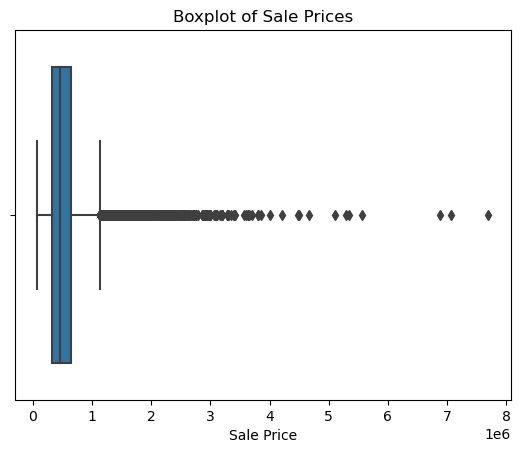

In [11]:
# Looking for ouliers in my target variable
sns.boxplot(x=sales_df['price'])
plt.xlabel('Sale Price')
plt.title('Boxplot of Sale Prices')
plt.show()


In [12]:
# Price variable

Q1 = sales_df['price'].quantile(0.25)
Q3 = sales_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_df_clean= sales_df[(sales_df['price'] >= lower_bound) & (sales_df['price'] <= upper_bound)]

num_outliers_removed = len(sales_df) - len(sales_df_clean)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 1146


In [13]:
# Bedrooms

Q1 = sales_df['bedrooms'].quantile(0.25)
Q3 = sales_df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_df_clean = sales_df[(sales_df['bedrooms'] >= lower_bound) & (sales_df['bedrooms'] <= upper_bound)]

num_outliers_removed = len(sales_df) - len(sales_df_clean)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 546


In [14]:
# Bathrooms

Q1 = sales_df['bathrooms'].quantile(0.25)
Q3 = sales_df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_df_clean = sales_df[(sales_df['bathrooms'] >= lower_bound) & (sales_df['bathrooms'] <= upper_bound)]

num_outliers_removed = len(sales_df) - len(sales_df_clean)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 571


In [15]:
sqft_living_summary = sales_df['sqft_living'].describe()
print(sqft_living_summary)

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


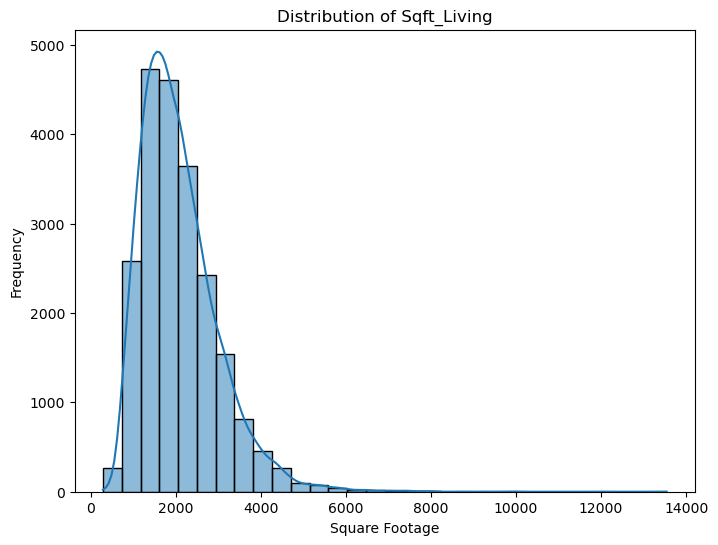

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(sales_df['sqft_living'], bins=30, kde=True)
plt.title('Distribution of Sqft_Living')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Sqft living outliers removal

Q1 = sales_df['sqft_living'].quantile(0.25)
Q3 = sales_df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_df_clean = sales_df[(sales_df['sqft_living'] >= lower_bound) & (sales_df['sqft_living'] <= upper_bound)]

num_outliers_removed = len(sales_df) - len(sales_df_clean)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 572


In [18]:
from sklearn.preprocessing import MinMaxScaler

sqft_living = sales_df_clean['sqft_living'].values.reshape(-1, 1)
scaler = MinMaxScaler()
sqft_living_normalized = scaler.fit_transform(sqft_living)
sales_df_clean['sqft_living_normalized'] = sqft_living_normalized


C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\3626402532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['sqft_living_normalized'] = sqft_living_normalized


In [19]:
sqft_living_summary = sales_df_clean['sqft_living_normalized'].describe()
print(sqft_living_summary)

count    21041.000000
mean         0.433734
std          0.195169
min          0.000000
25%          0.284264
50%          0.406091
75%          0.558376
max          1.000000
Name: sqft_living_normalized, dtype: float64


In [20]:
sqft_living_summary = sales_df['sqft_lot'].describe()
print(sqft_living_summary)

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


In [21]:
# Sqft Lot

Q1 = sales_df['sqft_lot'].quantile(0.25)
Q3 = sales_df['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_df_clean = sales_df[(sales_df['sqft_lot'] >= lower_bound) & (sales_df['sqft_lot'] <= upper_bound)]

num_outliers_removed = len(sales_df) - len(sales_df_clean)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 2425


In [22]:
from sklearn.preprocessing import MinMaxScaler

sqft_living = sales_df_clean['sqft_lot'].values.reshape(-1, 1)
scaler = MinMaxScaler()
sqft_lot_normalized = scaler.fit_transform(sqft_living)
sales_df_clean['sqft_lot_normalized'] = sqft_lot_normalized


C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\1666514168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['sqft_lot_normalized'] = sqft_lot_normalized


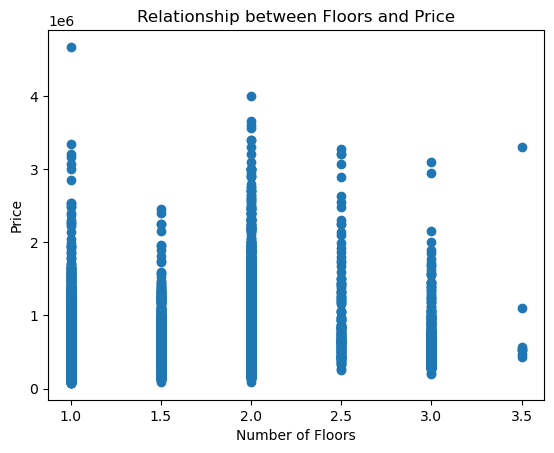

          floors     price
floors  1.000000  0.262377
price   0.262377  1.000000


In [23]:
# Floor

plt.scatter(sales_df_clean['floors'], sales_df_clean['price'])
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.title('Relationship between Floors and Price')
plt.show()


corr= sales_df_clean[['floors', 'price']].corr()
print(corr)


In [24]:
# A correlation coefficient of 0.264 suggests that there is a positive linear relationship between the number of floors and the price.

In [25]:
# Waterfront
unique_values = sales_df_clean['waterfront'].unique()
print("Unique values in 'Waterfront' column:", unique_values)

if set(unique_values) == {0, 1}:
    print("The 'Waterfront' column is correctly coded.")
else:
    sales_df_clean['waterfront'] = sales_df_clean['waterfront'].replace({1: 1, 0: 0})
    print("The 'Waterfront' column has been corrected.")


Unique values in 'Waterfront' column: [0 1]
The 'Waterfront' column is correctly coded.


In [26]:
# View

unique_values = sales_df_clean['view'].unique()
print("Unique values in 'View' column:", unique_values)

if set(unique_values) == {0, 1, 2, 3, 4}:
    print("The 'View' variable has consistent values within the range 0 to 4.")
else:
    print("The 'View' variable contains inconsistent values.")


Unique values in 'View' column: [0 3 4 2 1]
The 'View' variable has consistent values within the range 0 to 4.


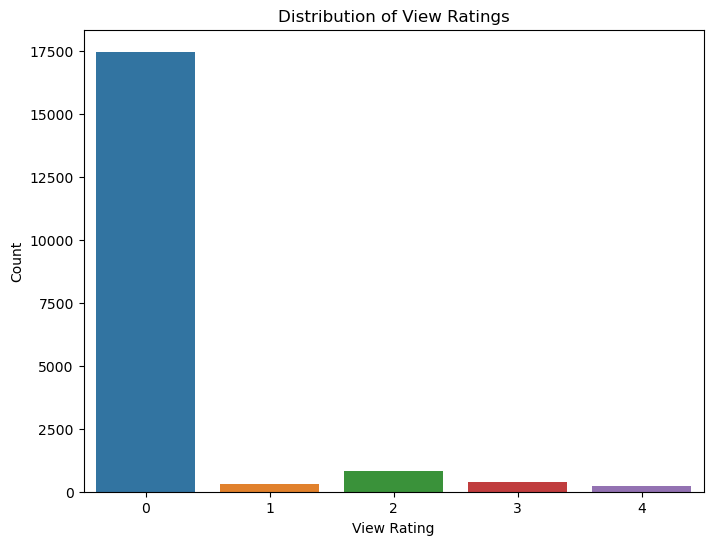

In [27]:

plt.figure(figsize=(8, 6))
sns.countplot(x='view', data=sales_df_clean)
plt.title('Distribution of View Ratings')
plt.xlabel('View Rating')
plt.ylabel('Count')
plt.show()


In [28]:
# Grade

sales_df_clean['Grade'] = sales_df_clean['grade'].astype('category')


C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\1137292020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['Grade'] = sales_df_clean['grade'].astype('category')


In [29]:
# Sum check for sqft_above
sales_df_clean['sqft_total'] = sales_df_clean['sqft_above'] + sales_df_clean['sqft_basement']
consistent = (sales_df_clean['sqft_total'] == sales_df_clean['sqft_living']).all()
if consistent:
    print("Consistency check passed: 'sqft_above' + 'sqft_basement' equals 'Sqft_Living' for all data points.")
else:
    print("Consistency check failed: There are inconsistencies between 'sqft_above', 'sqft_basement', and 'sqft_living'.")



Consistency check passed: 'sqft_above' + 'sqft_basement' equals 'Sqft_Living' for all data points.


C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\3668620751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['sqft_total'] = sales_df_clean['sqft_above'] + sales_df_clean['sqft_basement']


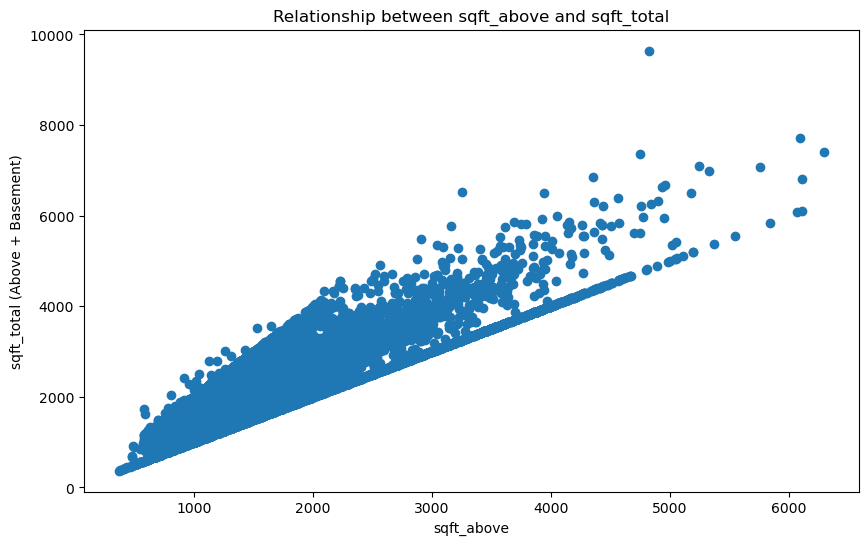

In [30]:
# Visual inspection
plt.figure(figsize=(10, 6))
plt.scatter(sales_df_clean['sqft_above'], sales_df_clean['sqft_total'])
plt.xlabel('sqft_above')
plt.ylabel('sqft_total (Above + Basement)')
plt.title('Relationship between sqft_above and sqft_total')
plt.show()


In [31]:
# sqft_basement to binary feature
sales_df_clean['Has_Basement'] = (sales_df_clean['sqft_basement'] > 0).astype(int)

C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\2913823197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['Has_Basement'] = (sales_df_clean['sqft_basement'] > 0).astype(int)


In [32]:
# year built

import datetime

current_year = datetime.datetime.now().year


sales_df_clean['house_age'] = current_year - sales_df_clean['yr_built']
sales_df_clean.drop(columns=['yr_built'], inplace=True)


C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\435277828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['house_age'] = current_year - sales_df_clean['yr_built']
C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\435277828.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean.drop(columns=['yr_built'], inplace=True)


In [33]:
# Renovated

sales_df_clean['renovated'] = np.where(sales_df_clean['yr_renovated'] > 0, 1, 0)
sales_df_clean['years_since_renovation'] = current_year - sales_df_clean['yr_renovated']


C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\2848347657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['renovated'] = np.where(sales_df_clean['yr_renovated'] > 0, 1, 0)
C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\2848347657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['years_since_renovation'] = current_year - sales_df_clean['yr_renovated']


In [34]:
# sqft living15

Q1 = sales_df['sqft_living15'].quantile(0.25)
Q3 = sales_df['sqft_living15'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_df_clean = sales_df[(sales_df['sqft_living15'] >= lower_bound) & (sales_df['sqft_living15'] <= upper_bound)]

num_outliers_removed = len(sales_df) - len(sales_df_clean)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 544


In [35]:
# sqft lot15

Q1 = sales_df['sqft_lot15'].quantile(0.25)
Q3 = sales_df['sqft_lot15'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sales_df_clean = sales_df[(sales_df['sqft_lot15'] >= lower_bound) & (sales_df['sqft_lot15'] <= upper_bound)]

num_outliers_removed = len(sales_df) - len(sales_df_clean)
print("Number of outliers removed:", num_outliers_removed)


Number of outliers removed: 2194


In [36]:
# Normalizing 'Sqft_Living15' and 'Sqft_Lot15'

scaler = MinMaxScaler()
sales_df_clean[['sqft_living15', 'sqft_lot15']] = scaler.fit_transform(sales_df_clean[['sqft_living15', 'sqft_lot15']])


C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\833127033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean[['sqft_living15', 'sqft_lot15']] = scaler.fit_transform(sales_df_clean[['sqft_living15', 'sqft_lot15']])


In [37]:
sales_df_clean.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0.139265,0.295816
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,0.206963,0.413516
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,0.406190,0.438547
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,0.143133,0.257353
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,0.228240,0.405468


In [38]:
# Extract year, month, and day from the date
sales_df_clean['year'] = sales_df_clean['date'].dt.year
sales_df_clean['month'] = sales_df_clean['date'].dt.month
sales_df_clean['day'] = sales_df_clean['date'].dt.day  


sales_df_clean.drop('date', axis=1, inplace=True)

C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\875157459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['year'] = sales_df_clean['date'].dt.year
C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\875157459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df_clean['month'] = sales_df_clean['date'].dt.month
C:\Users\tenyj\AppData\Local\Temp\ipykernel_50052\875157459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [39]:
# Writing the preprocessed data to a file
sales_df_clean.to_csv('preprocessed_kc_house_data.csv', index=True)

In [40]:
 print(pd.unique(sales_df_clean['view']))

[0 3 4 2 1]


In [41]:
 print(pd.unique(sales_df_clean['waterfront']))

[0 1]


In [42]:
 print(pd.unique(sales_df_clean['condition']))

[3 5 4 1 2]


In [43]:
 print(pd.unique(sales_df_clean['grade']))

[ 7  6  8  9  5 10 12 11  4  3 13]


In [44]:
sales_df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0.139265,0.295816,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,0.206963,0.413516,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,0.406190,0.438547,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,0.143133,0.257353,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,0.228240,0.405468,2015,2,18


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = sales_df_clean.drop('price', axis=1)
y = sales_df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [47]:
# Evaluating  the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 27060302600.768665
R-squared: 0.7334384889424549


In [48]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# RMSE
rmse_rf = np.sqrt(mse)

# MAE
mae_rf = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")

Root Mean Squared Error (RMSE): 164500.15988067814
Mean Absolute Error (MAE): 109828.53702331502


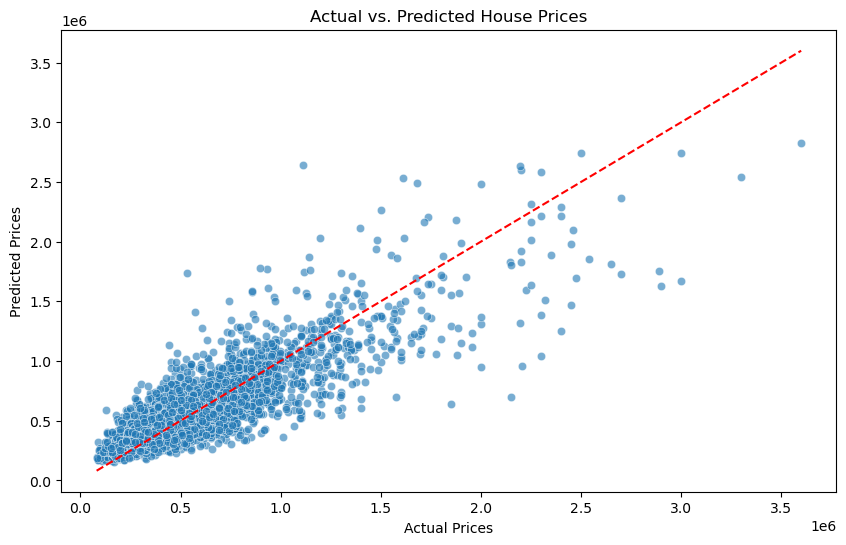

In [49]:

y_pred = rf_regressor.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()


In [50]:
# for training set
y_train_pred = rf_regressor.predict(X_train)

# for test set
y_test_pred = rf_regressor.predict(X_test)


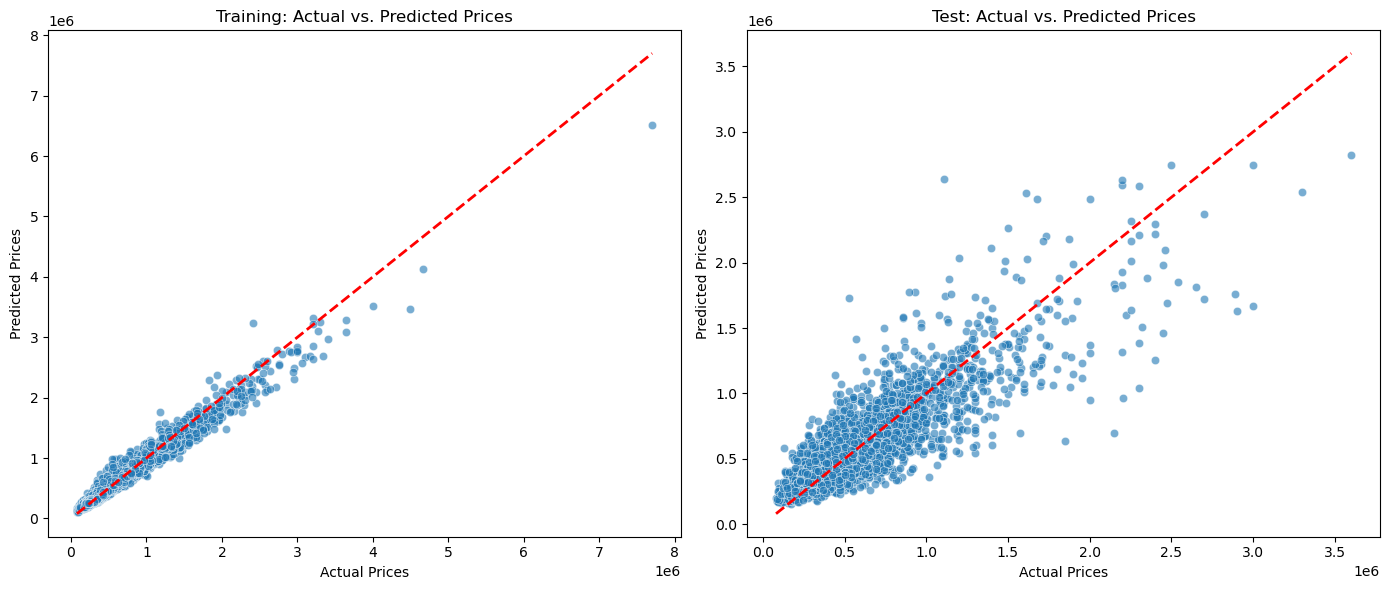

In [51]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1) 
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.title('Training: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Test: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()
